In [29]:
import pandas as pd
import numpy as np

In [30]:
import matplotlib.pyplot as plt

In [101]:
plt.style.use('seaborn-pastel')

data-link(kaggle): https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019

In [3]:
%%HTML
<style type = 'text/css'>
table.dataframe td, table.dataframe th{
    border: 1px black solid !important;
    color: black !important;
}

In [4]:
df_with_NOTA = pd.read_csv('LS_2.0.csv')

In [31]:
df_with_NOTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   STATE                                    2263 non-null   object 
 1   CONSTITUENCY                             2263 non-null   object 
 2   NAME                                     2263 non-null   object 
 3   WINNER                                   2263 non-null   int64  
 4   PARTY                                    2263 non-null   object 
 5   SYMBOL                                   2018 non-null   object 
 6   GENDER                                   2018 non-null   object 
 7   CRIMINAL CASES                           2018 non-null   object 
 8   AGE                                      2018 non-null   float64
 9   CATEGORY                                 2018 non-null   object 
 10  EDUCATION                                2018 no

In [32]:
df_with_NOTA.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [6]:
df_with_NOTA.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

> Cleaning the title of the columns 

In [7]:
df_with_NOTA.columns = ['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL VOTES', 'POSTAL VOTES', 'TOTAL VOTES',
       'OVER TOTAL ELECTORS IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'TOTAL ELECTORS']

> We will be working with two versions of our data:-
    1. The one without 'NOTA' entries.
    2. The one with 'NOTA' entries.
    
`NOTA`: None of the above, where elector does chose any of the standing candidate.

In [8]:
df = df_with_NOTA.dropna(axis=0)

In [9]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690


In [10]:
#We should reset index as we have dropped NaN values
df.reset_index(drop=True, inplace=True)

### We will start EDA straightaway with each feature one by one.

#### Gender

TOTAL NO OF MALE CANDIDATES: 1760
TOTAL NO OF FEMALE CANDIDATES: 258


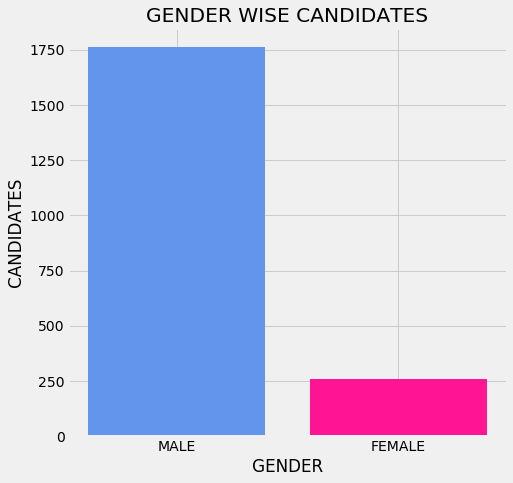

In [13]:
colors = ['cornflowerblue','deeppink']

fig, ax = plt.subplots(figsize=(7,7))

ax.bar(df['GENDER'].unique(), df['GENDER'].value_counts(), color = colors)

ax.set(xlabel = 'GENDER',
       ylabel = 'CANDIDATES',
       title = 'GENDER WISE CANDIDATES');

print('TOTAL NO OF MALE CANDIDATES:',df['GENDER'].value_counts()[0])
print('TOTAL NO OF FEMALE CANDIDATES:',df['GENDER'].value_counts()[1])

#### POLITICAL PARTIES

In [14]:
# Total number of parties 
#df['GENDER'].nunique() 
df['PARTY'].value_counts()[:7]

BJP       420
INC       413
IND       201
BSP       163
CPI(M)    100
VBA        47
AITC       47
Name: PARTY, dtype: int64

> Top seven parties w.r.t number of candidates.

In [12]:
plt.style.use('fivethirtyeight')

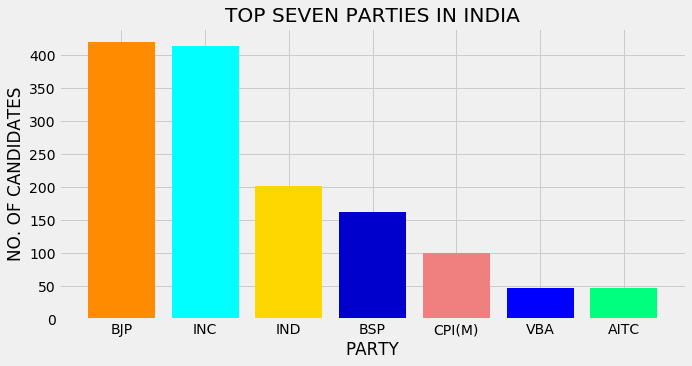

In [15]:
colors = ['darkorange','aqua','gold','mediumblue','lightcoral','blue','springgreen']


fig, ax = plt.subplots(figsize=(10,5))

ax.bar(df['PARTY'].value_counts().index[:7],df['PARTY'].value_counts()[:7], color=colors)

ax.set(xlabel = 'PARTY',
       ylabel = 'NO. OF CANDIDATES',
       title = 'TOP SEVEN PARTIES IN INDIA');


#### CRIMINAL CASES

In [16]:
df[df['CRIMINAL CASES'] == 'Not Available'].index

Int64Index([ 415,  472,  544,  545,  580,  582,  610,  864,  918,  933, 1000,
            1162, 1495, 1509, 1526, 1724, 1756, 1763, 1845, 1951, 1983, 2005],
           dtype='int64')

In [28]:
na_index = [ 468,  532,  612,  613,  654,  656,  688,  972, 1033, 1052, 1126,
            1309, 1681, 1696, 1716, 1938, 1971, 1978, 2069, 2188, 2223, 2249]

#for i in na_index:
    #df['CRIMINAL CASES'][i] = None

In [147]:
#df['CRIMINAL CASES'].dropna(axis=0, inplace=True)

In [151]:
#df['CRIMINAL CASES'] = df['CRIMINAL CASES'].astype(int)
# It is giving us a warning `SettingWithCopyWarning` as we are working on copy of original dataframe.

In [206]:
df['EDUCATION'].unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available'], dtype=object)

In [207]:
df_tmp = df.groupby(by='EDUCATION').sum()

In [213]:
plt.style.use('seaborn')

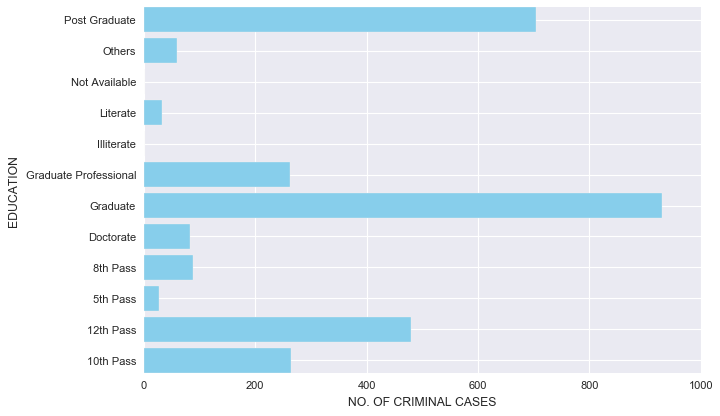

In [218]:
fig, ax = plt.subplots()

ax.barh(df_tmp.index, df_tmp['CRIMINAL CASES'], color='skyblue')

ax.set(xlabel = 'NO. OF CRIMINAL CASES',
       ylabel = 'EDUCATION');

In [219]:
df_tmp

,WINNER,CRIMINAL CASES,AGE,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
EDUCATION,,,,,,,,,
10th Pass,45,265.0,10330.0,51558437,214375,51772812,3122.287210,4558.599681,324651691
12th Pass,69,480.0,12807.0,69924422,259554,70183976,4142.400392,6188.182289,428828388
5th Pass,4,28.0,1429.0,4179312,10263,4189575,281.405993,410.996779,45126163
8th Pass,12,88.0,3923.0,14493505,52421,14545926,849.553273,1257.115643,130778515
Doctorate,23,83.0,3963.0,22787263,90382,22877645,1356.035306,2023.592968,122685208
Graduate,132,930.0,23010.0,140928620,527628,141456248,8464.126013,12379.296900,738915879
Graduate Professional,99,263.0,18307.0,107365982,393609,107759591,6518.316909,9574.127962,554363053
Illiterate,1,1.0,274.0,808061,3267,811328,52.703600,77.167301,7463446
Literate,2,33.0,1563.0,3103177,13999,3117176,169.035177,293.701219,53341560


#### EDUCATION V/s WINNING COUNT

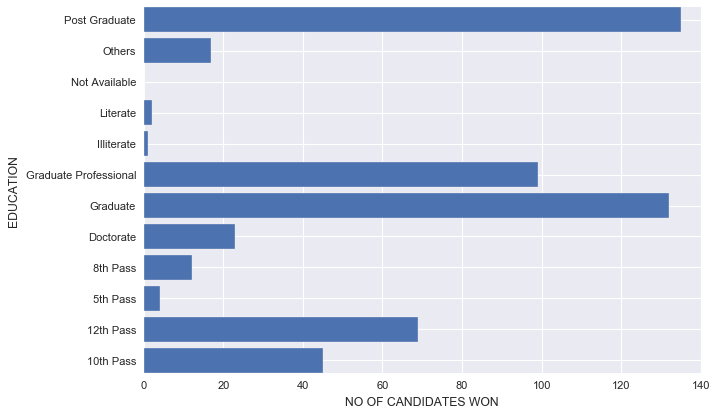

In [224]:
fig, ax = plt.subplots()

ax.barh(df_tmp.index, df_tmp['WINNER'])

ax.set(xlabel = 'NO OF CANDIDATES WON',
       ylabel = 'EDUCATION');

In [239]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [251]:
plt.style.use('seaborn-whitegrid')

In [246]:
df_tmp = df.groupby(by='CATEGORY').sum()

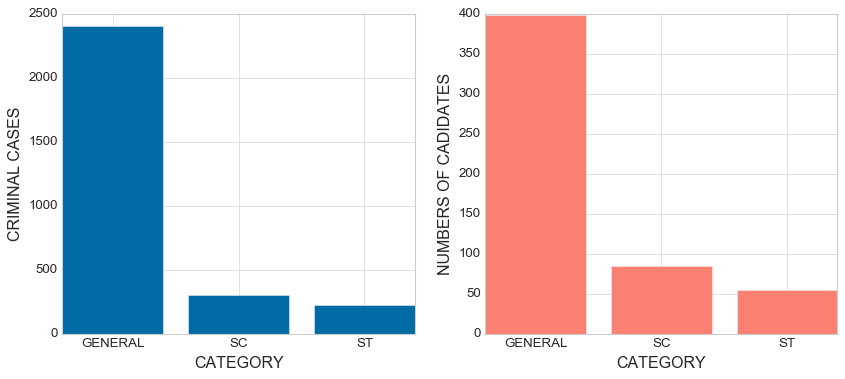

In [276]:
labels = {'General':399,'SC':85,'ST':45}
fig, ax = plt.subplots(1,2,figsize=(12.5,5))

ax[0].bar(df_tmp.index, df_tmp['CRIMINAL CASES'])
ax[1].bar(df_tmp.index, df_tmp['WINNER'], color='salmon')

ax[0].set(xlabel = 'CATEGORY',
          ylabel = 'CRIMINAL CASES')

ax[1].set(xlabel = 'CATEGORY',
          ylabel = 'NUMBERS OF CADIDATES');

In [357]:
ser = df['ASSETS'].str.replace('[Rs,\nLacsCrore+ThuHundNilNtAvilbl` ]','').str.split('~')

In [358]:
lst = []
for i in ser:
    lst.append(i)

In [359]:
for i in range(len(lst)):
    lst[i] = (lst[i][0])

In [360]:
len(ser)

1993

In [361]:
len(lst)

1993

In [364]:
#df['ASSETS'] = lst

In [365]:
df[df['ASSETS'] == ''].index

Int64Index([1523], dtype='int64')

In [368]:
#df.drop(index=[1523], inplace=True)

In [371]:
#df['ASSETS'] = df['ASSETS'].astype(float)

* We dropped few entries in order to convert `ASSETS` feature into numerical

* We will perform similar operations on `LIABILITIES` column

In [373]:
ser = df['LIABILITIES'].str.replace('[Rs,\nILacs+CroreThuHundNtAvilbl ]','').str.split('~')

In [374]:
lst = []
for i in ser:
    lst.append(i)

In [375]:
#lst

In [376]:
for i in range(len(lst)):
    lst[i] = (lst[i][0])

In [352]:
#lst

In [378]:
#df['LIABILITIES'] = lst

In [379]:
df[df['LIABILITIES'] == '']

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
186,Assam,AUTONOMOUS DISTRICT,JONES INGTI KATHAR,0,IND,Battery Torch,MALE,0.0,68.0,ST,Post Graduate,610218.0,,39425,158,39583,4.973082,6.406488,795945


In [381]:
#df.drop(index=186, inplace=True)

In [386]:
#df['LIABILITIES'] = df['LIABILITIES'].astype(float)

> As now both `ASSETS` & `LIABILITIES` are in numeric form we can perform analysis on it.

In [437]:
plt.style.use('seaborn-whitegrid')

In [422]:
df_tmp = df.groupby(by='WINNER').mean()

In [428]:
df_tmp['LIABILITIES'] = df_tmp['LIABILITIES']/1000

In [426]:
df_tmp['ASSETS'] = df_tmp['ASSETS']/1000

In [429]:
df_tmp

,CRIMINAL CASES,AGE,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
WINNER,,,,,,,,,,
0,1.311295,51.583333,105243.500209,14062.074909,183187.931129,607.331267,183795.262397,11.144879,16.268211,1.654582e+06
1,1.909091,54.441558,209424.415844,35953.624200,592460.847866,2481.823748,594942.671614,35.582162,52.391168,1.679446e+06


Text(0.5, 1.0, 'Mean Assets/Liabilities V/s Result')

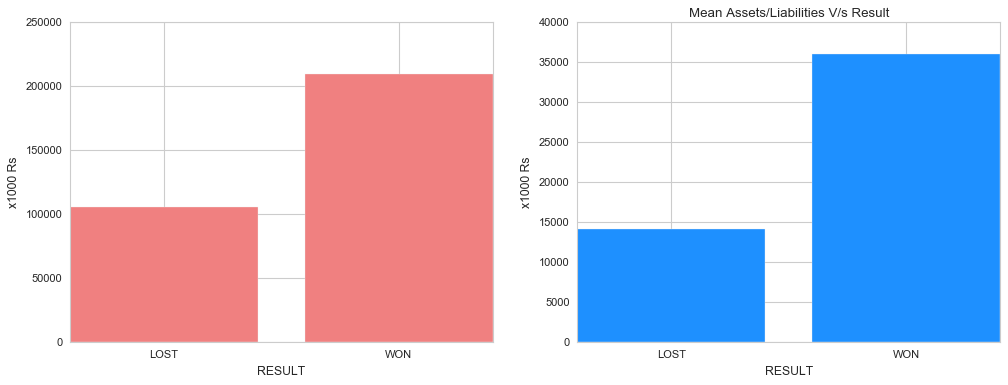

In [442]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].bar(['LOST', 'WON'], df_tmp['ASSETS'], color='lightcoral')

ax[1].bar(['LOST', 'WON'], df_tmp['LIABILITIES'], color='dodgerblue')

ax[0].set(xlabel = 'RESULT',
          ylabel = 'x1000 Rs')

ax[1].set(xlabel = 'RESULT',
          ylabel = 'x1000 Rs');

plt.title('Mean Assets/Liabilities V/s Result')

## Conclusion

* Data in original form was partially usable. Following columns were object dtype which are converted into numeric dtype:
    - ASSETS
    - LIABILITIES
    - CRIMINAL CASES.
***

* In this data we had NaN values which were due to NOTA option, these NaN values were dropped.
***

* Visuals has been created in order to obtain quick insights from not so easily readable data with the help of `Matplotlib`
***

* Data manipulation(Cleaning, dropping, converting) has been performed with the help of `Pandas`.
***

* As data analysis is an iterative process much more graphs and insights could have been created but for the essence of time and considering top features above insights has been created. While doing so data is converted into better condition in order to obtain valuable insights.